In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import pandas as pd
"""
Need:

1. Time plots
2. Seasonal Plots
3. Box plots
"""
apt_data = pd.read_csv('NZWN.csv')
apt_data.head()

/var/folders/mw/sxfcbx2d059gnq4bg5rfkzl40000gn/T/ipykernel_77813/2283544970.py:9: DtypeWarning: Columns (2,3,4,5,6,8,10,27) have mixed types. Specify dtype option on import or set low_memory=False.
  apt_data = pd.read_csv('NZWN.csv')


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,NZWN,2020-01-01 00:00,66.20,57.20,72.74,10.0,23.0,0.0,29.97,M,...,M,M,M,M,M,M,M,66.20,NZWN 010000Z AUTO 01023KT 9999 BKN018/// 19/14...,M
1,NZWN,2020-01-01 00:30,68.00,57.20,68.35,360.0,28.0,0.0,29.94,M,...,M,M,M,M,M,M,M,68.00,NZWN 010030Z AUTO 36028KT 9999 BKN019/// 20/14...,M
2,NZWN,2020-01-01 01:00,68.00,57.20,68.35,10.0,26.0,0.0,29.94,M,...,M,M,M,M,M,M,M,68.00,NZWN 010100Z AUTO 01026KT 9999 SCT021/// 20/14...,M
3,NZWN,2020-01-01 01:30,68.00,59.00,72.92,10.0,24.0,0.0,29.94,M,...,M,M,M,M,M,M,M,68.00,NZWN 010130Z AUTO 01024KT 9999 FEW020/// 20/15...,M
4,NZWN,2020-01-01 02:00,68.00,59.00,72.92,10.0,26.0,0.0,29.94,M,...,M,M,M,M,M,M,M,68.00,NZWN 010200Z AUTO 01026KT 9999 SCT019/// 20/15...,M


In [48]:
#make date and time column the index of data frame
apt_data.set_index('valid', inplace=True)
apt_data.index = pd.to_datetime(apt_data.index)

# Create descriptive statistics for weather data at wellington airport
apt_data.describe()

,p01i
count,104462.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


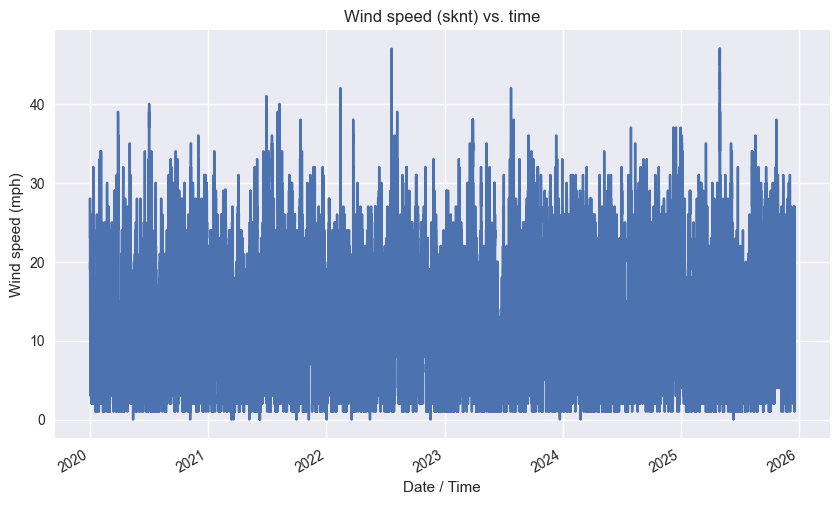

In [58]:
##Convert sknt to numeric ( account for M values )
apt_data['sknt'] = pd.to_numeric(apt_data['sknt'], errors='coerce')

## Create time plot
plt.style.use("seaborn-v0_8")

#plot time series for wind speed ( denoted as sknt in csv )
plt.figure(figsize=(10,6))
apt_data['sknt'].plot(title='Wind speed (sknt) vs. time')
plt.xlabel('Date / Time')
plt.ylabel('Wind speed (mph)')
plt.savefig('assets/wind_speed_v_time.png')
plt.show()

In [50]:
## pull out seasonal patterns for wind
apt_data['year'] = apt_data.index.year
apt_data['month'] = apt_data.index.month
apt_data.reset_index(inplace=True)
apt_data['week'] = apt_data['valid'].dt.isocalendar().week
apt_data['day'] = apt_data['valid'].dt.dayofweek
apt_data['hour'] = apt_data['valid'].dt.hour
apt_data['day_str'] = apt_data['valid'].dt.strftime('%j')
apt_data['year_month'] = apt_data['valid'].dt.strftime('%m')
apt_data.set_index('valid', inplace=True)

In [51]:
apt_data.head()

,station,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,...,feel,metar,snowdepth,year,month,week,day,hour,day_str,year_month
valid,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NZWN,66.20,57.20,72.74,10.0,23.0,0.0,29.97,M,6.21,...,66.20,NZWN 010000Z AUTO 01023KT 9999 BKN018/// 19/14...,M,2020,1,1,2,0,001,01
2020-01-01 00:30:00,NZWN,68.00,57.20,68.35,360.0,28.0,0.0,29.94,M,6.21,...,68.00,NZWN 010030Z AUTO 36028KT 9999 BKN019/// 20/14...,M,2020,1,1,2,0,001,01
2020-01-01 01:00:00,NZWN,68.00,57.20,68.35,10.0,26.0,0.0,29.94,M,6.21,...,68.00,NZWN 010100Z AUTO 01026KT 9999 SCT021/// 20/14...,M,2020,1,1,2,1,001,01
2020-01-01 01:30:00,NZWN,68.00,59.00,72.92,10.0,24.0,0.0,29.94,M,6.21,...,68.00,NZWN 010130Z AUTO 01024KT 9999 FEW020/// 20/15...,M,2020,1,1,2,1,001,01
2020-01-01 02:00:00,NZWN,68.00,59.00,72.92,10.0,26.0,0.0,29.94,M,6.21,...,68.00,NZWN 010200Z AUTO 01026KT 9999 SCT019/// 20/15...,M,2020,1,1,2,2,001,01


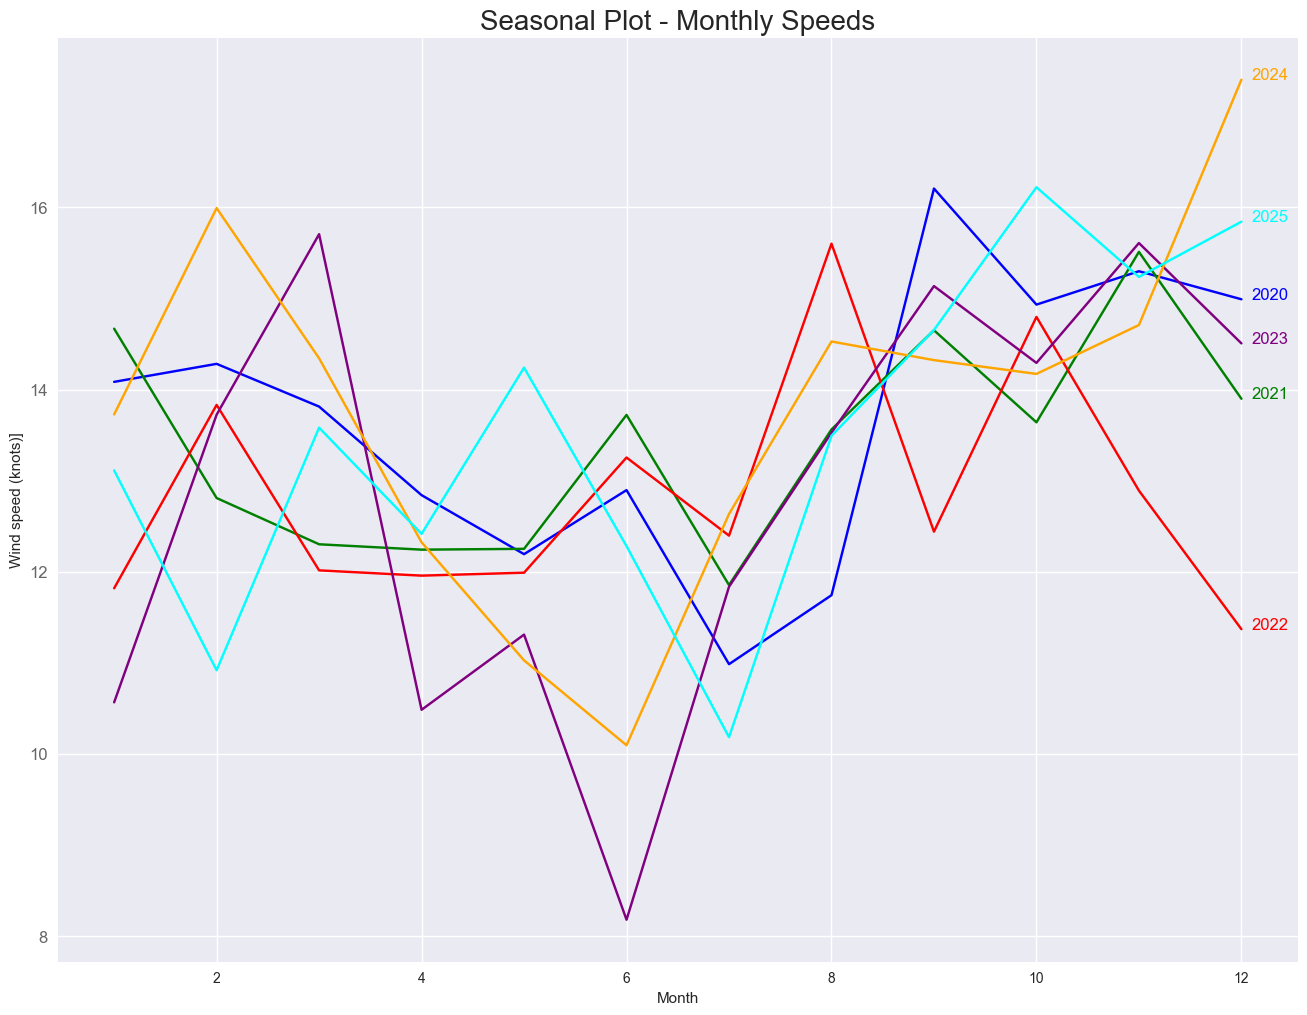

In [52]:
## Seasonal patterns for wind speeds on a monthly basis

np.random.seed(42)
df_plot = apt_data[['month', 'year', 'sknt']].dropna().groupby(['month', 'year']).mean()[['sknt']].reset_index()
years = df_plot['year'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'black']

##plot for monthly wind patterns
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i < len(colors):
        plt.plot('month', 'sknt', data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, 'sknt'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, 'sknt'][-1:].values[0], y, fontsize=12, color=colors[i])

plt.gca().set(ylabel= 'sknt', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Speeds", fontsize=20)
plt.ylabel('Wind speed (knots)]')
plt.xlabel('Month')
plt.savefig('assets/wind_speed_seasonal.png')
plt.show()


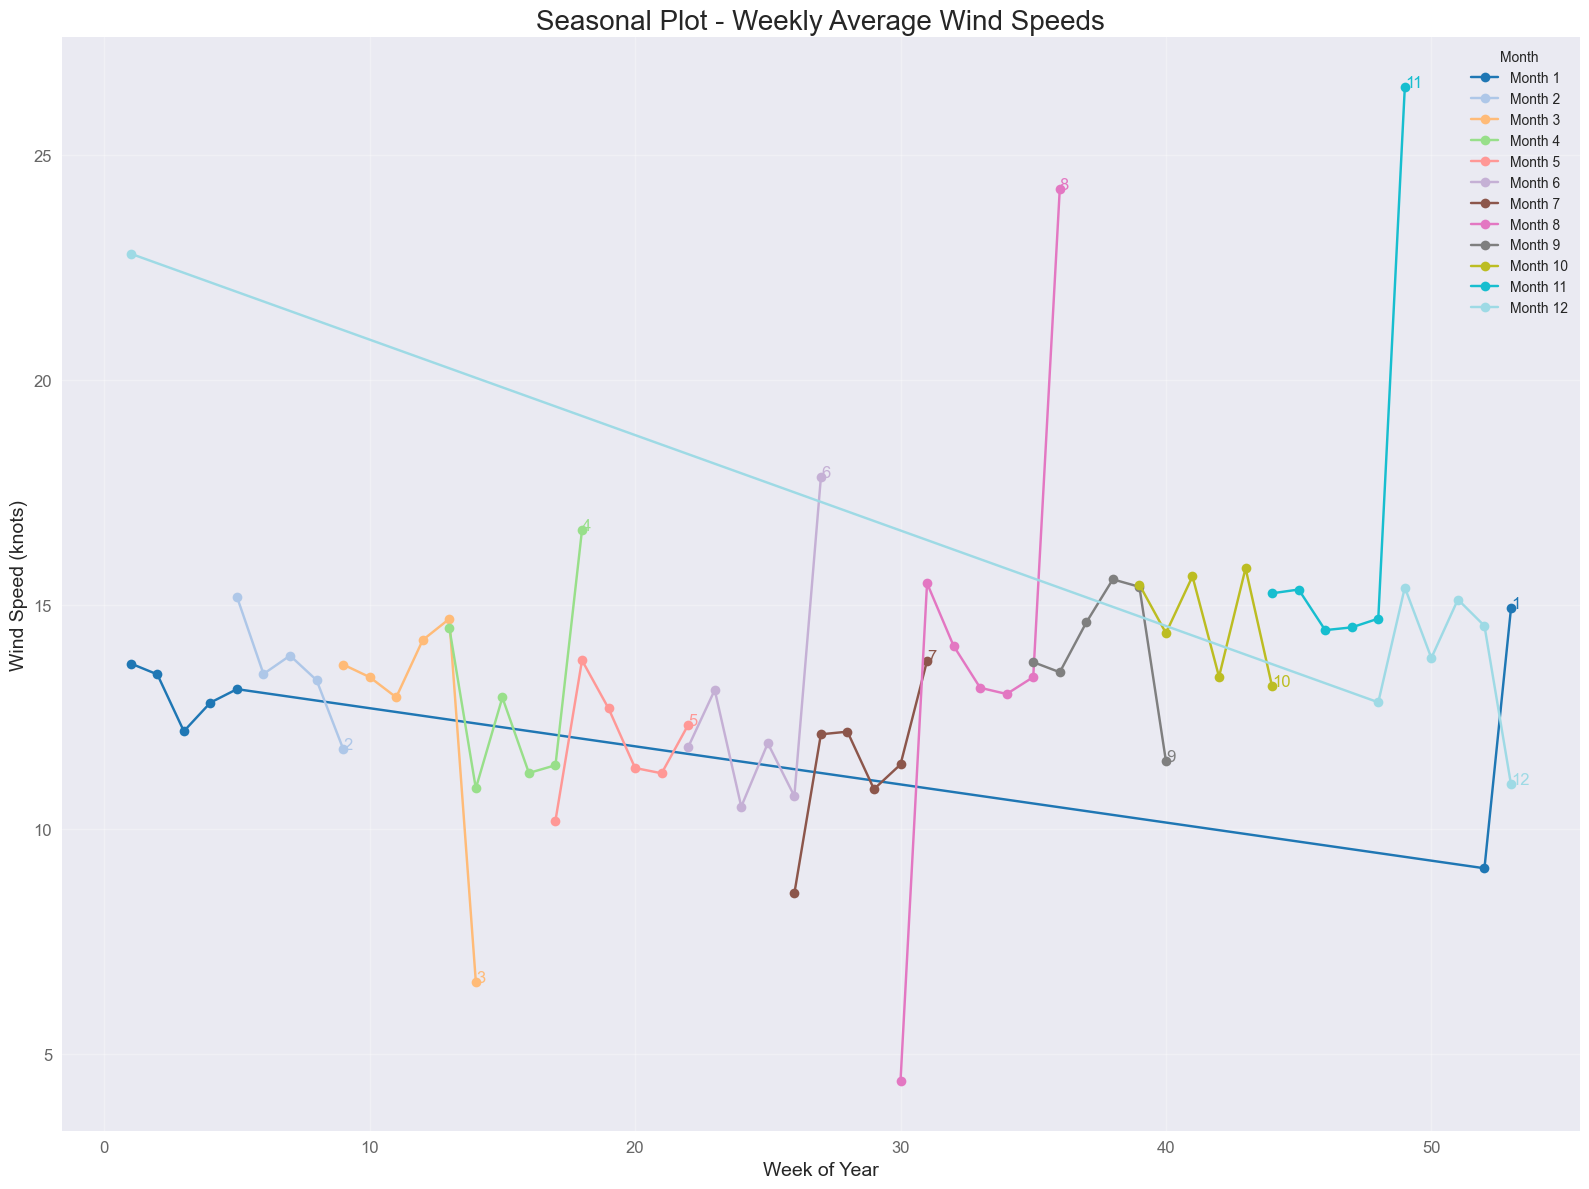

In [53]:
## Seasonal patterns for wind speeds on a weekly basis
np.random.seed(42)
df_plot = apt_data[['month', 'week', 'sknt']].dropna()
df_plot = df_plot.groupby(['week', 'month']).mean()[['sknt']].reset_index()
df_plot = df_plot.sort_values(by='week', ascending=True)

# Defining the color palette
months = sorted(df_plot['month'].unique())
colors = plt.colormaps.get_cmap('tab20')(np.linspace(0, 1, len(months)))

# plot figures for weekly wind speeds
plt.figure(figsize=(16, 12))
for i, month in enumerate(months):
    month_data = df_plot[df_plot['month'] == month]
    plt.plot(month_data['week'], month_data['sknt'], color=colors[i], label=f'Month {month}', marker='o')
    # Place text at the last actual data point
    if len(month_data) > 0:
        last_week = month_data['week'].iloc[-1]
        last_sknt = month_data['sknt'].iloc[-1]
        plt.text(last_week, last_sknt, f'{month}', fontsize=12, color=colors[i])

# Setting labels and titles
plt.xlabel('Week of Year', fontsize=14)
plt.ylabel('Wind Speed (knots)', fontsize=14)
plt.title('Seasonal Plot - Weekly Average Wind Speeds', fontsize=20)
plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.legend(title='Month', loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('assets/wind_speed_seasonal_weekly.png')
plt.show()

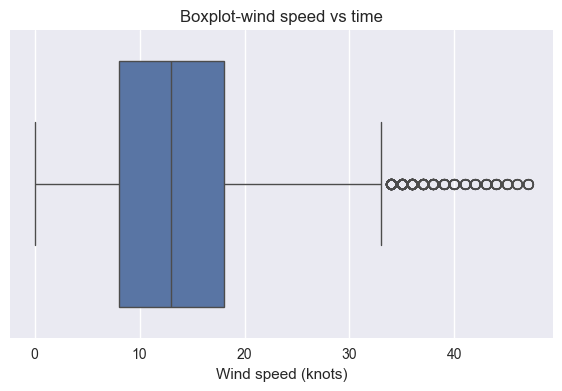

In [54]:
## Box plot on wind speed observations
import seaborn as sns
plt.figure(figsize=(7,4))
sns.boxplot(data= apt_data, x='sknt')
plt.xlabel('Wind speed (knots)')
plt.title(f'Boxplot-wind speed vs time')
plt.savefig('assets/wind_speed_boxplot.png')

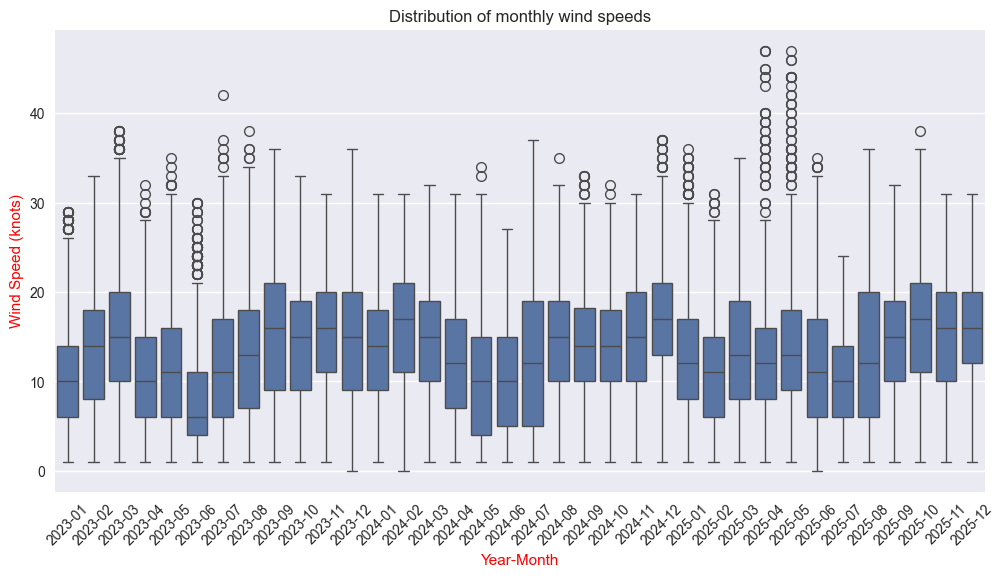

In [55]:
#Distribution of monthly speeds
apt_data['year'] = apt_data.index.year
apt_data['month'] = apt_data.index.month
apt_data['year_month'] = apt_data.index.strftime('%Y-%m')

#filter for 2023 and later
apt_plot = apt_data[apt_data['year'] >= 2023]
#plot boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='year_month', y='sknt', data=apt_plot)
plt.title('Distribution of monthly wind speeds')
plt.xlabel('Year-Month', color='red')
plt.ylabel("Wind Speed (knots)", color='red')
plt.xticks(rotation=45)
plt.savefig('assets/wind_speed_boxplot_monthly.png')
plt.show()


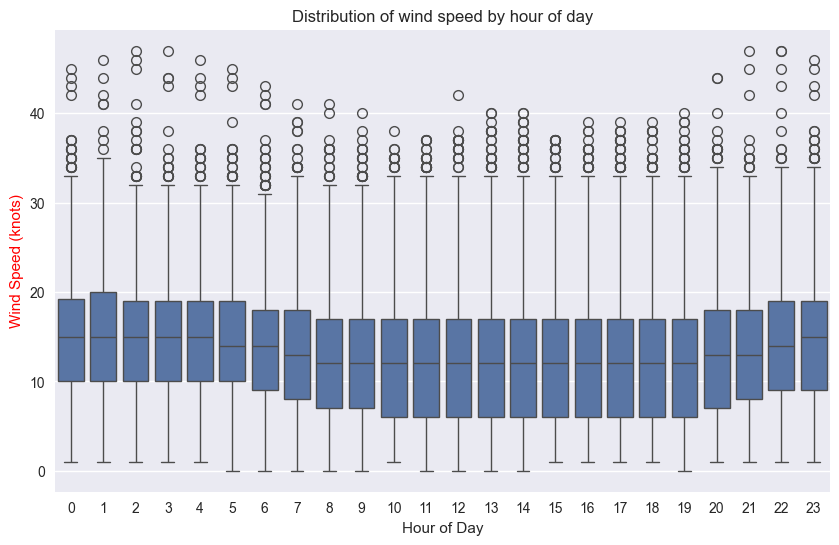

In [56]:
#Distribution of wind speeds by hour
plt.figure(figsize=(10,6))
sns.boxplot(x=apt_data['hour'], y=apt_data['sknt'])
plt.title('Distribution of wind speed by hour of day')
plt.xlabel('Hour of Day')
plt.ylabel('Wind Speed (knots)', color='red')
plt.savefig('assets/Wind_speed_boxplot_hour.png')
plt.show()